#KNN
This notebook contains:
1. Iris (classifier)
2. Persian Banking Cards' Digits (classifier)
3. Advertising (Regressor)

https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

* k-NN is used for classification or regression.
* In k-NN **classification**, the output is a class membership. An object is classified by a *plurality vote* of its neighbors, with the object being assigned to the class most common among its k nearest neighbors.
* In k-NN **regression**, the output is the property value for the object. This value is the *average* of the values of k nearest neighbors.

##Dimension reduction
For high-dimensional data (e.g., with number of dimensions more than 10) dimension reduction is usually performed prior to applying the k-NN algorithm in order to avoid the effects of the curse of dimensionality.

The curse of dimensionality in the k-NN context basically means that Euclidean distance is unhelpful in high dimensions because all vectors are almost equidistant to the search query vector 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from scipy.stats import mode

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score

In [2]:
#Download data
!gdown --id 1vZaPbRhfel2Y1uD5U0vi0zjCu58yYvS_

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1vZaPbRhfel2Y1uD5U0vi0zjCu58yYvS_
To: /content/Iris.csv
100% 5.11k/5.11k [00:00<00:00, 6.72MB/s]


In [22]:
#read csv file
df = pd.read_csv('Iris.csv')

In [23]:
#check how data looks
df.head(1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa


In [24]:
#change the target to categorical
target = df['Species'].astype('category') 

In [25]:
target = target.cat.codes

In [26]:
#drop the extra columns
df = df.drop(columns=['Id', 'Species'], axis=1)

In [28]:
#check again the feature table
df.head(1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2


In [29]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.3)

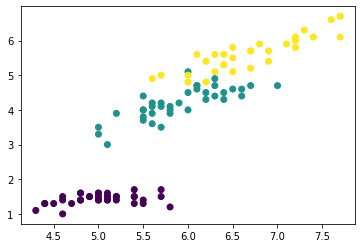

In [30]:
#plot a simple look of the data's distribution with two features
plt.scatter(X_train['SepalLengthCm'], X_train['PetalLengthCm'], c=y_train.values)

In [50]:
#define KNN function
def KNN(X_train, y_train, x_test, K=1):
  dist = np.linalg.norm(X_train.values - x_test, ord=2, axis=1)
  sorted_arg_dist = np.argsort(dist)
  y_nn = y_train.values[sorted_arg_dist[:K]]
  return mode(y_nn)[0][0]

In [61]:
#prediction phase
y_pred = np.zeros(len(X_test))
for i in range(len(X_test)):
  y_pred[i] = KNN(X_train, y_train, X_test.values[i], K=5)

In [62]:
#evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.92      0.92      0.92        12
           2       0.95      0.95      0.95        19

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [67]:
#applying built-in function / p is related Minkowski metric
knn = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree', p=2)

In [68]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree')

In [69]:
y_pred2 = knn.predict(X_test)

In [70]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.92      0.92      0.92        12
           2       0.95      0.95      0.95        19

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



#Image Classification with KNN

In [72]:
!ls

Iris.csv  persian.zip  sample_data


In [ ]:
!unzip persian.zip

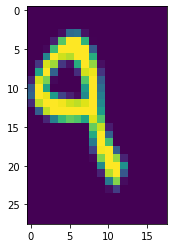

In [74]:
Im_flat = np.zeros((989, 28*18))
cnt = 0
target = np.zeros((989))
for i in range(10):
  ls = os.listdir(str(i) + 'p')
  
  for image_path in ls:
    Im = plt.imread(str(i) + 'p/' + image_path)
    Im_flat[cnt,:] = Im.reshape(-1) #flatten
    target[cnt] = i
    cnt += 1

plt.imshow(Im) #showing an example

In [75]:
X_train, X_test, y_train, y_test = train_test_split(Im_flat, target, test_size=0.2)

In [84]:
knn_image = KNeighborsClassifier(n_neighbors=5, algorithm='brute', p=2)

In [85]:
knn_image.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute')

In [86]:
y_pred3 = knn_image.predict(X_test)

In [87]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        18
         1.0       0.83      1.00      0.91        25
         2.0       0.58      0.83      0.68        18
         3.0       0.79      0.75      0.77        20
         4.0       1.00      0.57      0.73        28
         5.0       1.00      1.00      1.00        20
         6.0       0.95      0.91      0.93        22
         7.0       1.00      1.00      1.00        12
         8.0       1.00      1.00      1.00        18
         9.0       1.00      1.00      1.00        17

    accuracy                           0.89       198
   macro avg       0.91      0.91      0.90       198
weighted avg       0.91      0.89      0.89       198



#Evaluation

In [ ]:
neighbors = np.arange(1, 11)
p = [1, 2, np.inf]
for j in p:
  print('p is', j)
  for k in neighbors:
    kkn_val = KNeighborsClassifier(n_neighbors=k, p=j)
    scores = cross_val_score(kkn_val, X_train, y_train, cv=5,
                            scoring='accuracy')
    print('for k = ', k, 'acc is ', scores, 'mean_acc is ', scores.mean())

##Advertising (Regression with KNN)

Dataset: https://www.kaggle.com/datasets/ishaanv/ISLR-Auto

In [99]:
!gdown --id 1Mso_Kr0tD2TSnfXfMeP0CNyNZqPK1drt

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Mso_Kr0tD2TSnfXfMeP0CNyNZqPK1drt
To: /content/Advertising.csv
100% 5.17k/5.17k [00:00<00:00, 5.94MB/s]


In [100]:
df = pd.read_csv('Advertising.csv')
df.head(2)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4


Text(0.5, 1.0, 'Scatter Plot')

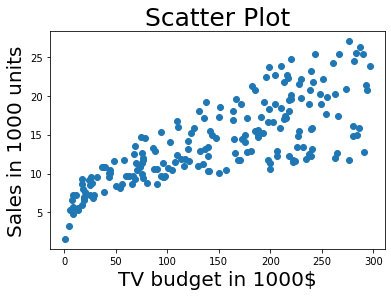

In [102]:
# Select variables and draw a scatter Plot 
x = df[['TV']].values # predictor 
y = df['Sales'].values #response or output variable

plt.scatter(x,y)
plt.xlabel('TV budget in 1000$' ,fontsize=20)
plt.ylabel('Sales in 1000 units',fontsize=20)
plt.title('Scatter Plot',fontsize=25)

In [103]:
#Split Data set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

Text(0.5, 1.0, 'ELBOW PLOT')

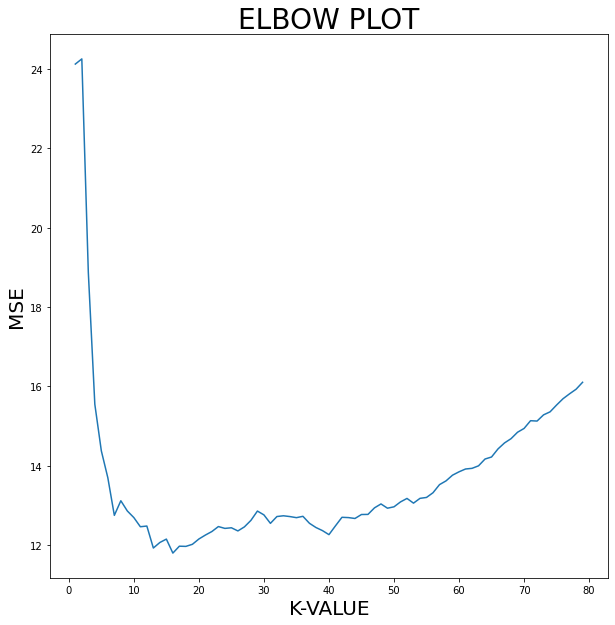

In [110]:
fig, ax = plt.subplots(figsize=(10,10))
k_list = np.arange(1,80,1)
knn_dict = {} # To store k and mse pairs
for i in k_list:
#Knn Model Creation
    knn = KNeighborsRegressor(n_neighbors=int(i))
    model_knn = knn.fit(x_train, y_train)
    y_knn_pred = model_knn.predict(x_test)
#Storing MSE 
    mse = mean_squared_error(y_test,y_knn_pred)
    knn_dict[i] = mse
#Plotting the results
ax.plot(np.array(list(knn_dict.keys())).astype(float), np.array(list(knn_dict.values())).astype(float))
ax.set_xlabel('K-VALUE', fontsize=20)
ax.set_ylabel('MSE', fontsize=20)
ax.set_title('ELBOW PLOT', fontsize=28)

In [105]:
mean_squared_error(y_test, y_knn_pred)

16.09995964856059

In [115]:
#k = 16
knn = KNeighborsRegressor(n_neighbors=16)
model_knn = knn.fit(x_train, y_train)
y_knn_pred = model_knn.predict(x_test)

In [116]:
r2_score(y_test, y_knn_pred)

0.6138943626418467